<a href="https://colab.research.google.com/github/KoviSingh/Disaster_Prediction/blob/main/Copy_of_DISASTER_PREDICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES.


In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



LOADING DATASET


In [ ]:

df = pd.read_csv('/content/all_month.csv')

df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-08-11T10:18:15.699Z,61.280000,-149.635500,30.80,1.30,ml,NaN,NaN,NaN,0.49,...,2020-08-11T10:26:13.058Z,"2 km N of Elmendorf Air Force Base, Alaska",earthquake,NaN,0.10,NaN,NaN,automatic,ak,ak
1,2020-08-11T10:12:52.490Z,33.583833,-116.802000,7.10,0.69,ml,37.0,41.0,0.03313,0.21,...,2020-08-11T10:16:36.077Z,"12km WNW of Anza, CA",earthquake,0.28,0.68,0.134,20.0,automatic,ci,ci
2,2020-08-11T10:02:20.820Z,35.744500,-117.528333,0.89,0.64,ml,9.0,163.0,0.18810,0.19,...,2020-08-11T10:05:51.249Z,"12km WSW of Searles Valley, CA",earthquake,0.47,0.95,0.231,7.0,automatic,ci,ci
3,2020-08-11T09:59:25.820Z,33.246167,-115.667000,3.27,1.42,ml,27.0,83.0,0.07307,0.19,...,2020-08-11T10:02:59.960Z,"13km SSE of Bombay Beach, CA",earthquake,0.34,0.68,0.214,28.0,automatic,ci,ci
4,2020-08-11T09:55:14.270Z,65.260200,-162.984200,3.20,2.20,ml,NaN,NaN,NaN,0.77,...,2020-08-11T10:24:31.874Z,"67 km NNE of White Mountain, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak


PREPROCESSING OF DATA

In [ ]:
# Columns to be deleted
columns_to_delete = ['time', 'magType','net','id','updated','place','type','status','locationSource','magSource','magNst']

# Deleting columns
df_new = df.drop(columns=columns_to_delete)

# Save the new DataFrame to a new CSV file
df_new.to_csv('new_dataset1.csv', index=False)

# Display the new DataFrame
df_new.head()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError
0,61.280000,-149.635500,30.80,1.30,NaN,NaN,NaN,0.49,NaN,0.10,NaN
1,33.583833,-116.802000,7.10,0.69,37.0,41.0,0.03313,0.21,0.28,0.68,0.134
2,35.744500,-117.528333,0.89,0.64,9.0,163.0,0.18810,0.19,0.47,0.95,0.231
3,33.246167,-115.667000,3.27,1.42,27.0,83.0,0.07307,0.19,0.34,0.68,0.214
4,65.260200,-162.984200,3.20,2.20,NaN,NaN,NaN,0.77,NaN,0.30,NaN


In [ ]:
missing_values = df_new.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
latitude              0
longitude             0
depth                 0
mag                   1
nst                4190
gap                2987
dmin               3958
rms                   0
horizontalError    5621
depthError            0
magError           5178
dtype: int64


In [ ]:
# Assuming df is your DataFrame
# Replace missing values with the mean of each column
# Replace missing values with the mean of each column (numeric columns only)
df_new = df_new.fillna(df.mean(numeric_only=True))

# Display the DataFrame after replacing missing values
df_new.head()


,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError
0,61.280000,-149.635500,30.80,1.30,19.871084,112.598592,0.411993,0.49,1.455368,0.10,0.224856
1,33.583833,-116.802000,7.10,0.69,37.000000,41.000000,0.033130,0.21,0.280000,0.68,0.134000
2,35.744500,-117.528333,0.89,0.64,9.000000,163.000000,0.188100,0.19,0.470000,0.95,0.231000
3,33.246167,-115.667000,3.27,1.42,27.000000,83.000000,0.073070,0.19,0.340000,0.68,0.214000
4,65.260200,-162.984200,3.20,2.20,19.871084,112.598592,0.411993,0.77,1.455368,0.30,0.224856


In [ ]:
missing_values = df_new.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
latitude           0
longitude          0
depth              0
mag                0
nst                0
gap                0
dmin               0
rms                0
horizontalError    0
depthError         0
magError           0
dtype: int64


In [ ]:
# Assuming df is your DataFrame
column_names = df_new.columns

# Display the column names
print("Column Names:")
print(column_names)


Column Names:
Index(['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms',
       'horizontalError', 'depthError', 'magError'],
      dtype='object')


SVM MODEL

In [ ]:
# Feature variables
feature_columns = ['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError']

# Feature variables (X) and target variable (y)
X = df_new[feature_columns]
y = df_new['mag']

# Data training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [ ]:
print(X['latitude'].size)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

14150


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X,y

(        latitude   longitude   depth        nst         gap      dmin   rms  \
 0      61.280000 -149.635500   30.80  19.871084  112.598592  0.411993  0.49   
 1      33.583833 -116.802000    7.10  37.000000   41.000000  0.033130  0.21   
 2      35.744500 -117.528333    0.89   9.000000  163.000000  0.188100  0.19   
 3      33.246167 -115.667000    3.27  27.000000   83.000000  0.073070  0.19   
 4      65.260200 -162.984200    3.20  19.871084  112.598592  0.411993  0.77   
 ...          ...         ...     ...        ...         ...       ...   ...   
 14145  36.073167 -117.642167    4.75  13.000000   85.000000  0.110600  0.14   
 14146  63.047100 -150.433700  107.20  19.871084  112.598592  0.411993  0.21   
 14147  38.816334 -122.813500    3.17  22.000000   46.000000  0.007542  0.02   
 14148  33.177833 -116.127833   11.36  35.000000   60.000000  0.040210  0.19   
 14149  67.791600 -158.636400   15.00  19.871084  112.598592  0.411993  0.42   
 
        horizontalError  depthError  m

In [ ]:
# Initialize and train the SVM regression model
svm_model = SVR(kernel='rbf')  # You can change the kernel type as needed
svm_model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.3485680009457038
Mean Squared Error: 0.23799121893501274
R-squared: 0.8029388554683661


In [ ]:
# Define thresholds for classifying magnitudes into three classes
thresholds = {
    'low': 3.0,
    'medium': 5.0,
    'high': float('inf')  # Maximum magnitude
}

# Function to classify magnitudes into three classes
def classify_magnitude(magnitude, thresholds):
    magnitude = float(magnitude)  # Convert magnitude to float
    for category, threshold in thresholds.items():
        if magnitude <= threshold:
            return category


# Classify actual and predicted magnitudes into three classes
actual_classes = [classify_magnitude((mag), thresholds) for mag in y_test]
predicted_classes = [classify_magnitude((mag), thresholds) for mag in y_pred]

# Calculate accuracy
correct_predictions = sum(1 for actual, predicted in zip(actual_classes, predicted_classes) if actual == predicted)
total_predictions = len(actual_classes)
accuracy = correct_predictions / total_predictions

# Print accuracy
print("Accuracy:", accuracy)


Accuracy: 0.9745583038869258


In [ ]:
#API to show Actual data of Earthquake
import requests

# Example API request for earthquake data in the past 30 days (adjust the parameters as needed)
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query'
params = {
    'format': 'geojson',
    'starttime': '2022-02-01',
    'endtime': '2022-03-01',
    'minlatitude': -90,
    'maxlatitude': 90,
    'minlongitude': -180,
    'maxlongitude': 180,
    'minmagnitude': 5.0,
}

response = requests.get(url, params=params)
data = response.json()

# Extract relevant information from the response (e.g., coordinates, magnitudes)
for event in data['features']:
    coordinates = event['geometry']['coordinates']
    magnitude = event['properties']['mag']
    place = event['properties']['place']

    print(f"Place: {place}, Magnitude: {magnitude}, Coordinates: {coordinates}")

Place: 155 km E of Shikotan, Russia, Magnitude: 5.1, Coordinates: [148.6452, 43.9146, 10]
Place: 140 km SSE of Kuril’sk, Russia, Magnitude: 5.1, Coordinates: [148.4635, 44.0361, 39.62]
Place: northern Mid-Atlantic Ridge, Magnitude: 5.6, Coordinates: [-45.0312, 22.4712, 10]
Place: South Sandwich Islands region, Magnitude: 5, Coordinates: [-26.2045, -59.7471, 37.67]
Place: 66 km WNW of Arauco, Chile, Magnitude: 5.7, Coordinates: [-73.993, -36.9801, 9.93]
Place: 42 km W of Coquimbo, Chile, Magnitude: 5.1, Coordinates: [-71.7733, -29.8884, 27.21]
Place: 150 km E of Shikotan, Russia, Magnitude: 5.1, Coordinates: [148.5834, 43.8999, 10]
Place: 73 km S of Pondaguitan, Philippines, Magnitude: 5.2, Coordinates: [126.2848, 5.7048, 119.18]
Place: 112 km S of Isangel, Vanuatu, Magnitude: 5, Coordinates: [169.4199, -20.5514, 65.22]
Place: northern Mid-Atlantic Ridge, Magnitude: 5.2, Coordinates: [-42.4488, 30.0963, 10]
Place: 170 km S of Merizo Village, Guam, Magnitude: 5, Coordinates: [144.4918, 1

In [ ]:
import numpy as np

new_data = np.array([44.0523, 147.0777, 91.42, 19.871084, 48, 3.232, 0.77, 7.9, 4.7, 0.021])

# Reshape the 1D array into a 2D array with a single row
new_data_2d = new_data.reshape(1, -1)

# Convert the 2D array to a DataFrame with feature names
new_data_df = pd.DataFrame(new_data_2d, columns=feature_columns)

# Apply the same scaling transformation to the new data
new_data_scaled = scaler.transform(new_data_df)

# Use the trained model to make predictions on the scaled data
predictions = svm_model.predict(new_data_scaled)

# Print the predictions
print(predictions)


[4.7716615]


Place: 155 km E of Shikotan, Russia, Magnitude: 4.1, Coordinates: [148.6452, 43.9146, 10]
#Predicting using SVM

[3.78669099]


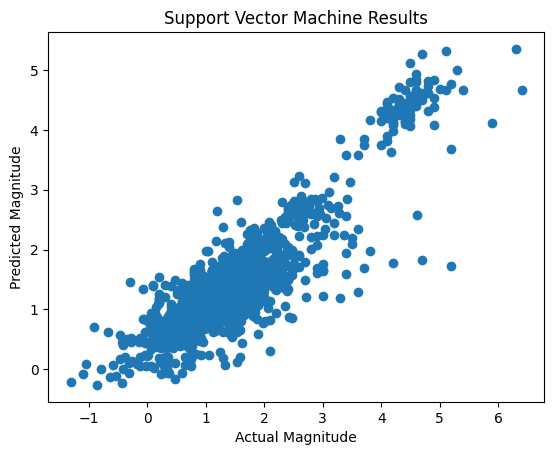

In [ ]:
import matplotlib.pyplot as plt
new_data = np.array([148.6452, 43.9146, 109, 19.871084, 48, 3.232, 0.77, 7.9, 4.7, 0.021])

# Reshape the 1D array into a 2D array with a single row
new_data_2d = new_data.reshape(1, -1)

# Convert the 2D array to a DataFrame with feature names
new_data_df = pd.DataFrame(new_data_2d, columns=feature_columns)

# Apply the same scaling transformation to the new data
new_data_scaled = scaler.transform(new_data_df)

# Use the trained model to make predictions on the scaled data
predictions = svm_model.predict(new_data_scaled)

# Print the predictions
print(predictions)

# Plot the predicted and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Support Vector Machine Results')
plt.show()

In [ ]:
import numpy as np

# Define thresholds for classifying magnitudes into three classes
thresholds = {
    'low': 3.0,
    'medium': 5.0,
    'high': float('inf')  # Maximum magnitude
}

# Function to classify magnitude into three classes
def classify_magnitude(magnitude, thresholds):
    magnitude = float(magnitude)
    for category, threshold in thresholds.items():
        if magnitude <= threshold:
            return category

# Classify actual and predicted magnitudes into three classes for 'mag'
actual_classes_mag = [classify_magnitude(mag, thresholds) for mag in y_test]
predicted_classes_mag = [classify_magnitude(mag, thresholds) for mag in y_pred]

# Calculate accuracy for 'mag'
correct_predictions_mag = sum(1 for actual, predicted in zip(actual_classes_mag, predicted_classes_mag) if actual == predicted)
total_predictions_mag = len(actual_classes_mag)
accuracy_mag = correct_predictions_mag / total_predictions_mag

# Print accuracy for 'mag'
print("Accuracy for 'mag':", accuracy_mag)



Accuracy for 'mag': 0.9745583038869258


Confusion Matrix:
[[1295    3    0]
 [  24   81    2]
 [   1    6    3]]


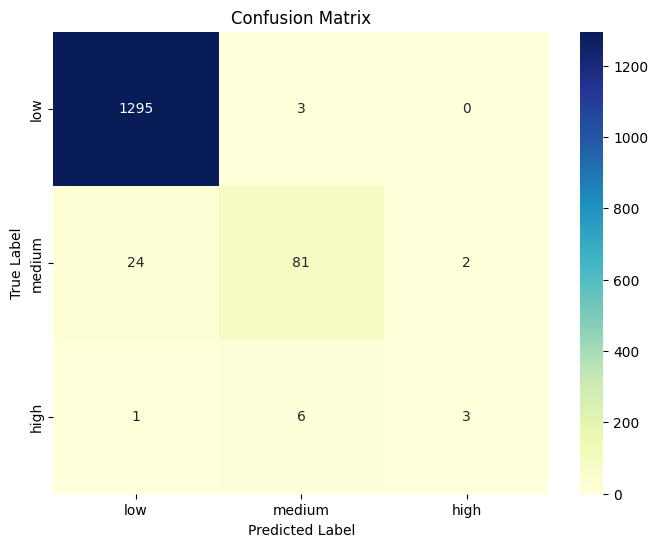

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the true and predicted labels
true_labels = ['low', 'medium', 'high']
predicted_labels = ['low', 'medium', 'high']

# Calculate the confusion matrix
conf_matrix = confusion_matrix(actual_classes_mag, predicted_classes_mag, labels=true_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix with bright colors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=true_labels, yticklabels=true_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**RANDOM FOREST METHOD**

In [ ]:
 #Columns to be deleted
columns_to_delete = ['time', 'magType','net','id','updated','place','type','status','locationSource','magSource','magNst','nst','gap','dmin','depthError','horizontalError','magError']

# Deleting columns
df_new= df.drop(columns=columns_to_delete)

# Save the new DataFrame to a new CSV file
df_new.to_csv('new_dataset.csv', index=False)

# Display the new DataFrame
df_new.head()

,latitude,longitude,depth,mag,rms
0,61.280000,-149.635500,30.80,1.30,0.49
1,33.583833,-116.802000,7.10,0.69,0.21
2,35.744500,-117.528333,0.89,0.64,0.19
3,33.246167,-115.667000,3.27,1.42,0.19
4,65.260200,-162.984200,3.20,2.20,0.77


In [ ]:
df_new = df_new.fillna(df.mean(numeric_only=True))
# Display the DataFrame after replacing missing values
df_new.head()

,latitude,longitude,depth,mag,rms
0,61.280000,-149.635500,30.80,1.30,0.49
1,33.583833,-116.802000,7.10,0.69,0.21
2,35.744500,-117.528333,0.89,0.64,0.19
3,33.246167,-115.667000,3.27,1.42,0.19
4,65.260200,-162.984200,3.20,2.20,0.77


In [ ]:
print(len(df_new['longitude']))
print(len(df_new['latitude']))
print(len(df_new['depth']))
print(len(df_new['mag']))

14150
14150
14150
14150


In [ ]:
df_new = df_new[(df_new['longitude'] >= -180) & (df_new['longitude'] <= 180)]
df_new = df_new[(df_new['latitude'] >= -90) & (df_new['latitude'] <= 90)]

!pip install basemap

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


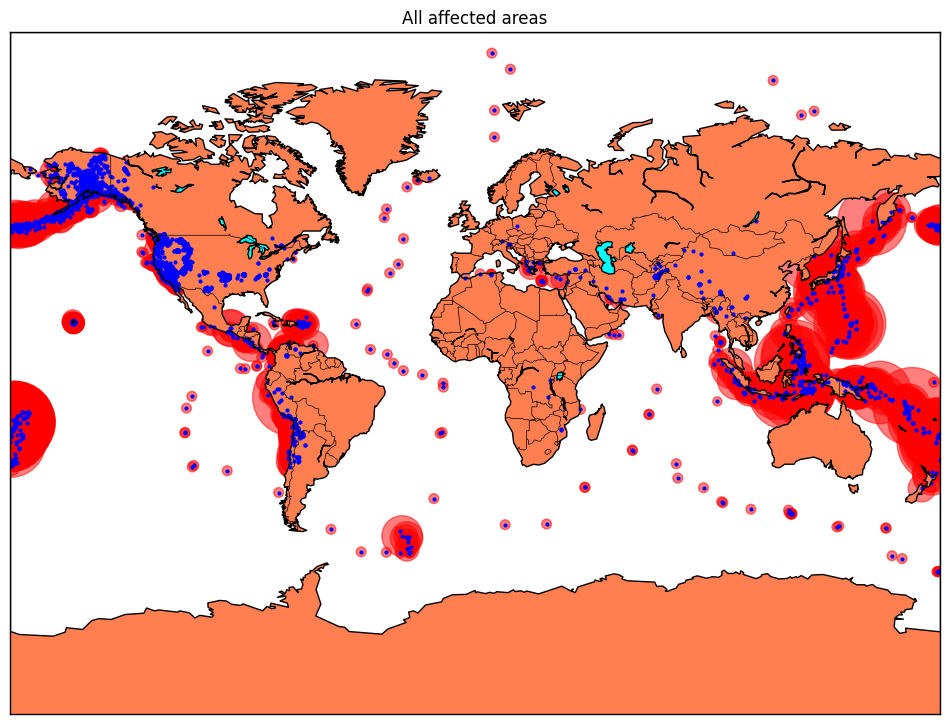

In [ ]:

from mpl_toolkits.basemap import Basemap

# Assuming df_new is your DataFrame containing latitude, longitude, mag, and depth columns

# Selecting latitude and longitude as x
x = df_new[['latitude', 'longitude']]

# Selecting mag and depth as y
y = df_new[['mag', 'depth']]

# Creating a Basemap instance
m = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Creating a figure
fig = plt.figure(figsize=(12, 10))
plt.title("All affected areas")

# Plotting latitude and longitude on the Basemap
x_coords, y_coords = m(x['longitude'].values, x['latitude'].values)

# Plotting 'mag' values as blue circles
m.plot(x_coords, y_coords, "o", markersize=2, color='blue')

# Plotting 'depth' values as red dots with sizes proportional to the depth
m.scatter(x_coords, y_coords, s=df_new['depth'] * 5, color='red', alpha=0.5)

# Adding coastlines, continents, map boundary, and countries
m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawmapboundary()
m.drawcountries()

# Displaying the plot
plt.show()

In [ ]:

# Selecting latitude and longitude as x
x = df_new[['latitude', 'longitude', 'depth']]

# Selecting mag and depth as y
y = df_new[['mag']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(11320, 3) (2830, 3) (11320, 1) (2830, 1)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(random_state=42)
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
reg.score(x_test,y_test)

0.784874536541343

In [ ]:
san_francisco_data = [34.0522, -118.2437,23]
japan_data = [35.68, 139.76,45]
import numpy as np

san_francisco_data = np.array([san_francisco_data])  # Convert to numpy array and add an extra dimension
japan_data = np.array([japan_data])
# Make predictions using the trained model
san_francisco_pred = reg.predict(san_francisco_data)
japan_pred = reg.predict(japan_data)

# Display the predictions
print("Predicted Magnitude and depth for San Francisco:", san_francisco_pred[0])
print("Predicted Magnitude and depth for Japan:", japan_pred[0])

Predicted Magnitude and depth for San Francisco: 1.2254000000000003
Predicted Magnitude and depth for Japan: 4.550000000000004


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:

df_new.head()

,latitude,longitude,depth,mag,rms
0,61.280000,-149.635500,30.80,1.30,0.49
1,33.583833,-116.802000,7.10,0.69,0.21
2,35.744500,-117.528333,0.89,0.64,0.19
3,33.246167,-115.667000,3.27,1.42,0.19
4,65.260200,-162.984200,3.20,2.20,0.77


In [ ]:

#printing accuracy for RANDOM FOREST model

In [ ]:
print(y_pred)

[2.2232 1.6957 0.8379 ... 1.4629 0.7812 0.8287]


In [ ]:
print(y_test)



        mag
2337   1.61
10912  1.21
3646   1.72
8790   4.40
13603  0.62
...     ...
5508   1.51
5653   1.55
6740   1.44
12992  0.55
6335   0.79

[2830 rows x 1 columns]


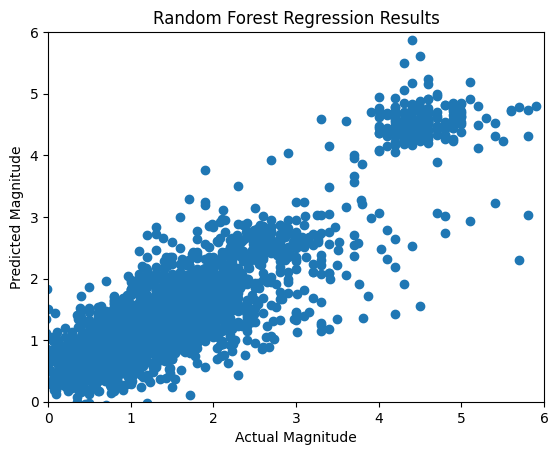

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.scatter(y_test['mag'], y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Random Forest Regression Results')

plt.axis([0, 6, 0, 6])  # Specify axis limits as [xmin, xmax, ymin, ymax]
plt.show()



In [ ]:
import numpy as np

# Define thresholds for classifying magnitudes into three classes
thresholds = {
    'low': 3.0,
    'medium': 5.0,
    'high': float('inf')  # Maximum magnitude
}

# Function to classify magnitude into three classes
def classify_magnitude(magnitude, thresholds):
    magnitude = float(magnitude)
    for category, threshold in thresholds.items():
        if magnitude <= threshold:
            return category

# Classify actual and predicted magnitudes into three classes for 'mag'
actual_classes_mag = [classify_magnitude(mag, thresholds) for mag in y_test['mag']]
predicted_classes_mag = [classify_magnitude(mag, thresholds) for mag in y_pred]

# Calculate accuracy for 'mag'
correct_predictions_mag = sum(1 for actual, predicted in zip(actual_classes_mag, predicted_classes_mag) if actual == predicted)
total_predictions_mag = len(actual_classes_mag)
accuracy_mag = correct_predictions_mag / total_predictions_mag

# Print accuracy for 'mag'
print("Accuracy for 'mag':", accuracy_mag)



Accuracy for 'mag': 0.9653710247349824


In [ ]:
from sklearn.metrics import confusion_matrix

# Define the true and predicted labels
true_labels = ['low', 'medium', 'high']
predicted_labels = ['low', 'medium', 'high']

# Calculate the confusion matrix
conf_matrix = confusion_matrix(actual_classes_mag, predicted_classes_mag, labels=true_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[2548   11    0]
 [  61  183    8]
 [   2   16    1]]


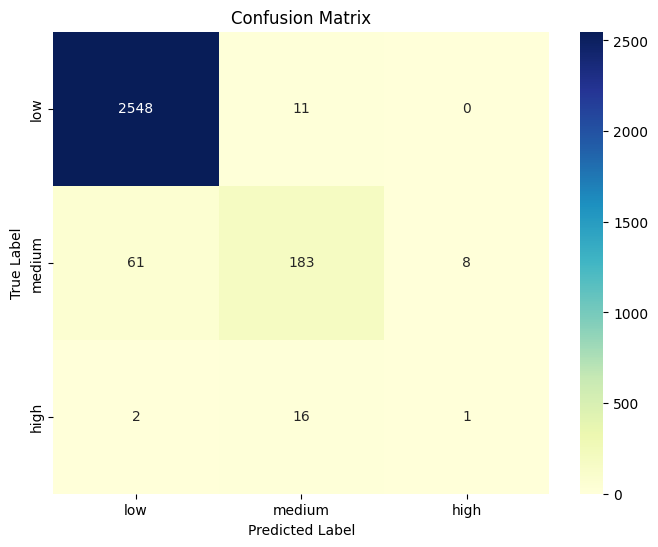

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix with bright colors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=true_labels, yticklabels=true_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss = model.evaluate(x_test, y_test)
print("Test Loss:", loss)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 34.2239 - val_loss: 1.3211
Epoch 2/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.6097 - val_loss: 0.9993
Epoch 3/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2799 - val_loss: 1.0322
Epoch 4/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.7722 - val_loss: 0.7529
Epoch 5/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9451 - val_loss: 0.7632
Epoch 6/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7327 - val_loss: 0.7067
Epoch 7/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6776 - val_loss: 0.7102
Epoch 8/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8834 - val_loss: 0.9268
Epoch 9/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9031 - val_loss: 0.6941
Epoch 10/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6587 - val_loss: 1.2119
Epoch 11/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7902 - val_loss: 0.6170
Epoch 12/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

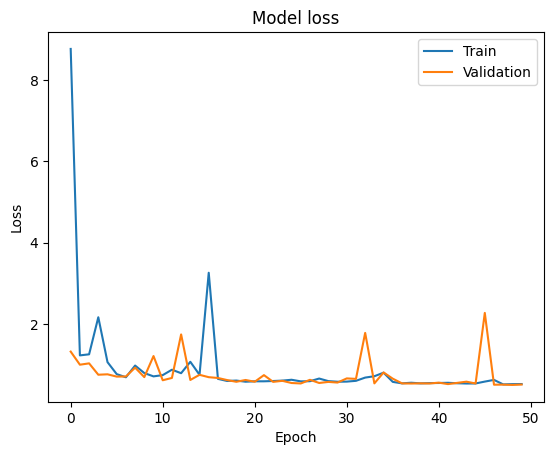

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1.6133397]
 [1.6060412]
 [1.1920538]
 ...
 [1.2371471]
 [1.027083 ]
 [1.3966274]]


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Assuming you have already trained and compiled your neural network model (named 'model')
# Make predictions on the test data
y_pred = model.predict(x_test)


predictions = model.predict(x_test)

# Print the predictions
print(predictions)

<ipython-input-35-3e9eb991b38a>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  magnitude = float(magnitude)


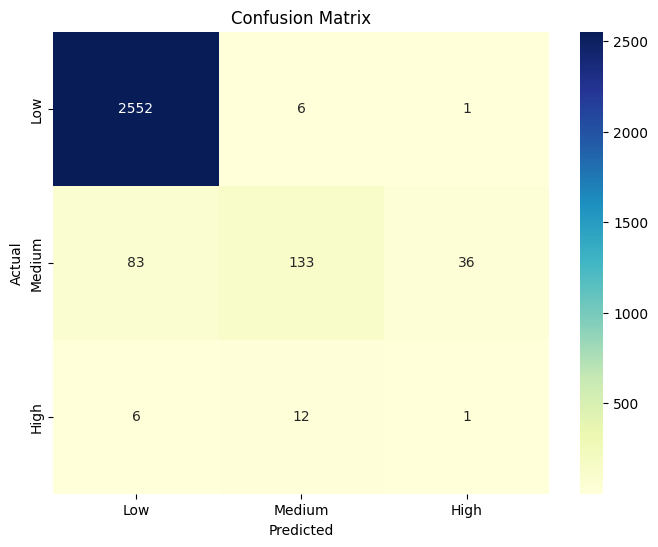

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define actual and predicted classes for 'mag'
actual_classes_mag = [classify_magnitude(mag, thresholds) for mag in y_test['mag']]
predicted_classes_mag = [classify_magnitude(mag, thresholds) for mag in predictions]

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_classes_mag, predicted_classes_mag, labels=['low', 'medium', 'high'])

# Define labels for the confusion matrix
labels = ['Low', 'Medium', 'High']

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Assuming you have already trained and compiled your neural network model (named 'model')
# Make predictions on the test data

